## Лабораторная работа №3

*Чуворкин Михаил А-13-19*

N = 33

k = 1

решение с помощью LU реализовано в виде двух функций, одна из которых возвращает две матрицы – L и U, не модифицируя A, а вторая функция решает систему; решение с помощью LU по схеме частич-ного выбора модифицирует исходную матрицу А. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
import random
from scipy import linalg

In [2]:
A = np.array([
    [np.sin(i + 1) ** (20 - j) for j in range(5)]
    for i in range(5)
])


x = np.array([33] * 5)
print(x)
B = np.dot(A, x)
print(B)
np.linalg.solve(A, B)

[33 33 33 33 33]
[7.60404265e+00 3.00683752e+01 9.50549260e-13 2.71530199e-01
 1.55926268e+01]


array([33., 33., 33., 33., 33.])

##### Решение с помощью LU разложения 
**LU** - возвращает 2 матрицы - L и U 

In [3]:
def LU(A):
    n = A.shape[0]
    lu = A.copy()
    for k in range(n-1):                
        for i in range(k+1,n):          
            lu[i,k] = lu[i,k]/lu[k,k]      
            for j in range(k+1,n):      
                lu[i,j] -= lu[i,k]*lu[k,j] 
    l = lu.copy()
    for i in range(n):
            l[i, i] = 1
            l[i, i+1 :] = 0
    u = lu.copy()
    for i in range(1, n):
        u[i, :i] = 0

    return (l, u)


In [4]:
def LU2(a):
       
    l_matrix = np.matrix(np.zeros([a.shape[0], a.shape[1]]))
    u_matrix = np.matrix(np.zeros([a.shape[0], a.shape[1]]))
    n = a.shape[0]

    for k in range(n):
        
        for j in range(k, n):
            u_matrix[k, j] = a[k, j] - l_matrix[k, :k] * u_matrix[:k, j]
        
        for i in range(k, n):
            l_matrix[i, k] = (a[i, k] - l_matrix[i, : k] * u_matrix[: k, k]) / u_matrix[k, k]

    return (l_matrix, u_matrix)

##### Решение с помощью LU по схеме частичного выбора с модификацией исходной матрицы
**lu_pivot** - возвращает вектор решений

In [5]:
def lu_pivot(A, b):
    n = A.shape[0]
    A = A.astype(np.float64)
    piv = np.arange(0,n)
    for k in range(n-1):

        # piv
        max_row_index = np.argmax(abs(A[k:n,k])) + k
        piv[[k,max_row_index]] = piv[[max_row_index,k]]
        A[[k,max_row_index]] = A[[max_row_index,k]]

        # LU 
        for i in range(k+1,n):          
            A[i,k] = A[i,k]/A[k,k]      
            for j in range(k+1,n):      
                A[i,j] -= A[i,k]*A[k,j] 

     
    b = b[piv]
    y = b.copy().astype(np.float64)
    for i in range(n): 
        for j in range(i):
            y[i] -= A[i,j]*y[j]
            
    for i in range(A.shape[0]-1,-1,-1): 
        for j in range(i+1, A.shape[1]):
            y[i] -= A[i,j]*y[j]
        y[i] = y[i]/A[i,i]
    
    return y

**solve_LU** - принимает марицы L U и вектор правых частей и возвращает вектор решений

In [6]:
def solve_LU(l, u, b):
    n = l.shape[0]
    y = np.array(np.zeros(n))
    l = np.squeeze(np.asarray(l))
    for i in range(n):
        y[i] = b[i] - sum(l[i, :i] * y[:i])
    #print(y)
    x = np.array(np.zeros(n))
    u = np.squeeze(np.asarray(u))
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - sum(u[i, i:] * x[i:])) / u[i, i]
    #print(x)
    return x

In [7]:
# решение с помощью LU
al, au = LU(A)
x1 = solve_LU(al, au, B)
print(x1)

#al, au = LU2(A)
#print(solve_LU(al, au, B))

# встроенная в numpy функция решения слау
print(np.linalg.solve(A, B))

# решение по схеме частичного выбора с модификацией исходной матриц
A_piv = A.copy()
x_piv = lu_pivot(A_piv, B)
print(x_piv)


[33. 33. 33. 33. 33.]
[33. 33. 33. 33. 33.]
[33. 33. 33. 33. 33.]


##### Решение возмущенной системы

In [8]:
def delta_x_exp(x1, x2):
    return np.linalg.norm(x2 - x1, np.inf) / np.linalg.norm(x1)

def delta_x_th(a, a_err):
    return np.linalg.cond(a, np.inf) * ( err / np.linalg.norm(a, np.inf))

In [9]:
ri = 3 #random.randint(0, 4)
rj = 2 #random.randint(0, 4)
Aa = A.copy()
err = 1e-3
Aa[ri ,rj] += err


al, au = LU(Aa)
x2 = solve_LU(al, au, B)

print(x2 - x1)


d_x_exp = delta_x_exp(x1, x2) 
d_x_th = delta_x_th(A, err) 

print(d_x_exp)
print(d_x_th)
print(np.linalg.cond(A, np.inf))

[ 5.15740139 -4.81167058 -4.1360393   4.44908773 -0.53400945]
0.06989272786014215
115076969172.38585
270919197706601.6


In [10]:
Aa_piv = Aa.copy()
x_piv_2 = lu_pivot(Aa, B)
print(x_piv_2 - x_piv)

d_x_exp = delta_x_exp(x_piv, x_piv_2) 
d_x_th = delta_x_th(A, err) 

print(d_x_exp)
print(d_x_th)

[ 5.15740139 -4.81167058 -4.1360393   4.44908773 -0.53400945]
0.06989272786014418
115076969172.38585


In [11]:
delta_x1 = []
delta_x2 = []
delta_x3 = []

for dim in range(5, 16):
    x = np.array([33] * dim)
    A = np.array([
        [np.sin(i + 1) ** (20 - j) for j in range(dim)]
        for i in range(dim)
    ])
    b = np.dot(A, x)
    A[3, 2] += err;
    
    al, au = LU(A)
    x1 = solve_LU(al, au, b)
    x2 = np.linalg.solve(A, b)
    x3 = lu_pivot(A, b)
    delta_x1.append(delta_x_exp(x1, x))
    delta_x2.append(delta_x_exp(x2, x))
    delta_x3.append(delta_x_exp(x3, x))

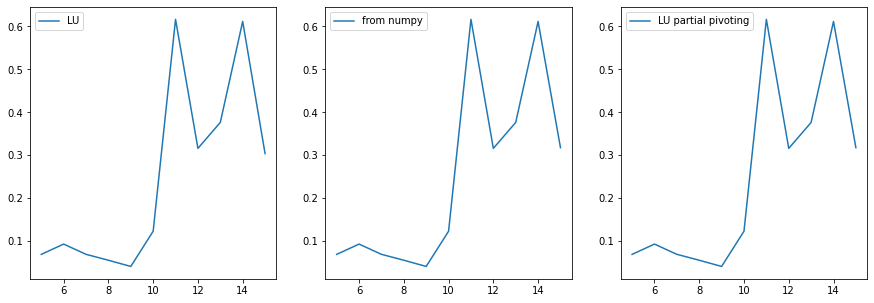

In [12]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
axs[0].plot(range(5,16), delta_x1, label = "LU")
axs[1].plot(range(5,16), delta_x2, label = "from numpy")
axs[2].plot(range(5,16), delta_x3, label = "LU partial pivoting")
axs[0].legend()
axs[1].legend()
axs[2].legend()


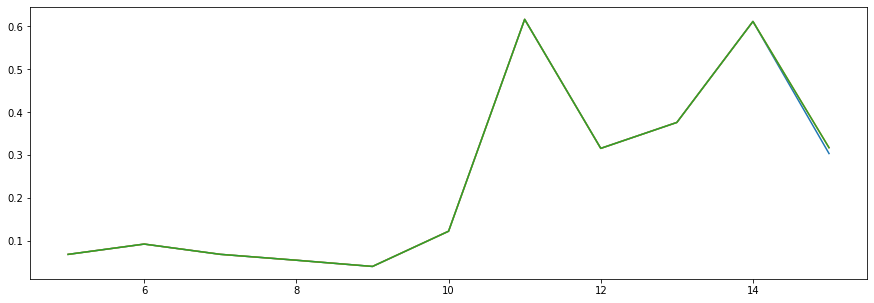

In [13]:
fig, axs = plt.subplots(1, 1, figsize = (15, 5))
axs.plot(range(5,16), delta_x1, label = "LU")
axs.plot(range(5,16), delta_x2, label = "LU partial pivoting")
axs.plot(range(5,16), delta_x3, label = "from numpy")

**Вывод:** графики зависимостей погрешности от n совпали, что показывает аналогичность методов

### Задача 3.2 

Вариант 33

$n = 65$ 

$b_i = n * i + n$ 

На главной диагонали элементы равны 87, на 23 наддиагонали элементы равны 30, на второй побочной диагонли элементы равны 4

In [14]:
A = np.zeros((65, 65))
for i in range(65):
    for j in range(65):
        if i == 66 - j:
            A[i, j] = 4 
        if i == j :
            A[i , j] = 87
        if i == j - 23:
            A[i, j] = 30

pprint.pprint(A)

array([[87.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 87.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 87., ...,  0.,  0.,  4.],
       ...,
       [ 0.,  0.,  0., ..., 87.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 87.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0., 87.]])


$x_k a + x_{k+23}c + x_{66-k}d = b_k$

In [15]:
x = np.zeros(65)
a = 87
c = 30
d = 4

#print(x)
cyc = []

b = np.array([(65 * i + 65) for i in range(1, 66)])
#print(b)

# ищет зацикливания в системе (выделяем слау с меньшим количеством переменных)
def findx(k, cycle):
    if k > 41 and k < 65:
        #print(k)
        if cycle.count(k) == 0:
            cycle.append(k)
            x[k] = (b[k] - findx(66 - k, cycle) * d) / a
        return 0
    if k < 2 and k >= 0:
        #print(k)
        if cycle.count(k) == 0:
            cycle.append(k)
            x[k] = (b[k] - findx(k + 23, cycle) * c) / a
        return 0# x[k]
    if k >=2 and k <= 41:
        #print(k)
        if cycle.count(k) == 0:
            cycle.append(k)
            if k == 33:
                x[k] = (b[k] - findx(k + 23, cycle) * c) / (2 * a)
            else:
                x[k] = ( b[k] - findx(k + 23, cycle) * c - findx(66 - k, cycle) * d) / a
        return 0# x[k]
    if k < 0 or k > 64:
        return 0


for i in range(65):
    findx(i, cyc)
    print(cyc)
    cyc.clear()
    
#print(x)

[0, 23, 46, 20, 43]
[1, 24, 47, 19, 42]
[2, 25, 48, 18, 41, 64]
[3, 26, 49, 17, 40, 63]
[4, 27, 50, 16, 39, 62]
[5, 28, 51, 15, 38, 61]
[6, 29, 52, 14, 37, 60]
[7, 30, 53, 13, 36, 59]
[8, 31, 54, 12, 35, 58]
[9, 32, 55, 11, 34, 57]
[10, 33, 56]
[11, 34, 57, 9, 32, 55]
[12, 35, 58, 8, 31, 54]
[13, 36, 59, 7, 30, 53]
[14, 37, 60, 6, 29, 52]
[15, 38, 61, 5, 28, 51]
[16, 39, 62, 4, 27, 50]
[17, 40, 63, 3, 26, 49]
[18, 41, 64, 2, 25, 48]
[19, 42, 24, 47]
[20, 43, 23, 46]
[21, 44, 22, 45]
[22, 45, 21, 44]
[23, 46, 20, 43]
[24, 47, 19, 42]
[25, 48, 18, 41, 64, 2]
[26, 49, 17, 40, 63, 3]
[27, 50, 16, 39, 62, 4]
[28, 51, 15, 38, 61, 5]
[29, 52, 14, 37, 60, 6]
[30, 53, 13, 36, 59, 7]
[31, 54, 12, 35, 58, 8]
[32, 55, 11, 34, 57, 9]
[33, 56, 10]
[34, 57, 9, 32, 55, 11]
[35, 58, 8, 31, 54, 12]
[36, 59, 7, 30, 53, 13]
[37, 60, 6, 29, 52, 14]
[38, 61, 5, 28, 51, 15]
[39, 62, 4, 27, 50, 16]
[40, 63, 3, 26, 49, 17]
[41, 64, 2, 25, 48, 18]
[42, 24, 47, 19]
[43, 23, 46, 20]
[44, 22, 45, 21]
[45, 21, 44, 

Дальше не смог придумать, что делать

### Задача 3. Вариант 33
Метод минимальных невязок

$m = 26$

$\beta = (66 - 33 + 5) \cdot 26 = 988$ 

$$ a_{i,j} = \frac{cos(i + j)}{0.1 \cdot \beta} + 0.1 \cdot \beta e^{-(i-j)^2}$$

$$a_{i,j} = \frac{\cos(i + j)}{98.8} + 98.8\cdot e^{-(i-j)^2} $$

In [16]:
A = np.array([
    [np.cos(i + j) / 98.8 + 98.8 * np.exp(-(i-j)**2) for j in range(26)]
    for i in range(26)
])
x = np.array([33 for i in range(26)])

In [17]:
b = A @ x
print(b)

[4520.24525046 5719.56144865 5778.99971561 5779.2195592  5779.30073434
 5779.57057788 5779.78136377 5779.73929648 5779.48305248 5779.24822133
 5779.2507057  5779.48822147 5779.74239775 5779.77954602 5779.56551235
 5779.2970783  5779.2210409  5779.40730858 5779.6846277  5779.79803234
 5779.64325879 5779.3626051  5779.21373611 5778.93155241 5719.49361426
 4520.24011151]


0.007061794017375197
0.007061794017375197
0.008153539489052002
0.008153539489052002
0.00809061725177208
0.00809061725177208
0.008892354062723215
0.008892354062723215
0.008602043962124724
0.008602043962124724
0.00931131640335852
0.00931131640335852
0.008880727522575162
0.008880727522575162
0.009548144833547387
0.009548144833547387
0.00904184563313603
0.00904184563313603
0.009690360295790408
0.009690360295790408
0.009141457167184648
0.009141457167184648
0.009781293138096404
0.009781293138096404


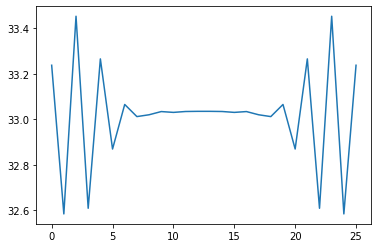

168.3699620740472 12
[33.23815309 32.58331902 33.45397188 32.60815919 33.26616032 32.86918652
 33.06540399 33.01198912 33.02003067 33.03410994 33.03049339 33.03441559
 33.0351356  33.03513456 33.03441345 33.03049213 33.03411061 33.02003324
 33.01199071 33.06540304 32.86918918 33.26614991 32.60817576 33.45395391
 32.58334111 33.23813973]


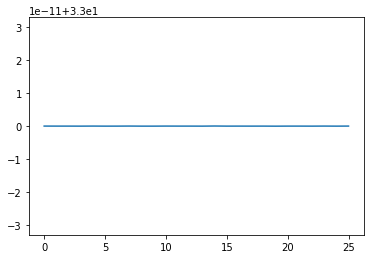

168.2676439485619
[33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.
 33. 33. 33. 33. 33. 33. 33. 33.]


In [24]:
n = 26
x1 = b
eps = 0.00001

N = 0
r0 = A @ x1 - b
r = r0
tau = ((A@r)@r) / ((A@r)@(A@r)) # tau_1

while np.linalg.norm(r)/np.linalg.norm(r0)>eps:
    N += 1
    x1 = x1 - tau * r
    r = A @ x1 - b
    print( ((A@r)@r) / ((A@r)@(A@r)) )
    tau = np.dot(A@r, r) / np.dot(A@r, A@r)
    print(tau)
    #print(tau)
     

plt.plot(x1)
plt.show()
print(np.linalg.norm(x1),N)
print(x1)

plt.plot(np.linalg.solve(A,b))
plt.show()
print(np.linalg.norm(np.linalg.solve(A,b)))
print(np.linalg.solve(A, b))